In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

In [2]:
def accuracy(y_pred,y_act):  ## y_pred is the y cap in the formula
    return (100.0*np.sum(y_pred==y_act)/y_act.shape[0])

In [3]:
def softmax(a):  ## a vector a
    
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis = 1,keepdims=True)  ## adding the sum along the col
    
    return ans

In [4]:
def loss(y_hot,p):     
    
    l = -np.mean(y_hot*np.log(p))

    return l

In [5]:
def one_hot(y,depth):  ## depth is no. of classes
    
    m = y.shape[0]
    y_out = np.zeros((m,depth))
    y_out[np.arange(m),y] = 1  ## the one that matches with y is 1
    
    return y_out

## Making A Simple NN from random data

In [6]:
X,y = make_circles(n_samples=500,shuffle=True,noise=0.05,random_state=1,factor=0.8)

In [7]:
print(X.shape,y.shape)

(500, 2) (500,)


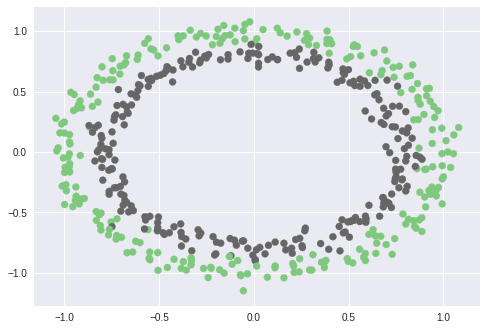

In [8]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Accent)
plt.show()

In [9]:
input_size = 2
layers = [4,3]
output = 2

In [16]:
class NeuralNetwork:
    
    def __init__(self,Inp,layers,Out):
        
        np.random.seed(0)
    
        model = {}
        model["w1"] = np.random.randn(Inp,layers[0])/np.sqrt(Inp)
        model["b1"] = np.zeros((1,layers[0]))
        model["w2"] = np.random.randn(layers[0],layers[1])/np.sqrt(layers[0])
        model["b2"] = np.zeros((1,layers[1]))
        model["w3"] = np.random.randn(layers[1],Out)/np.sqrt(layers[1])
        model["b3"] = np.zeros((1,Out))
    
        self.model = model
        
    def forward_prop(self,X):
        
        z1 = X.dot(self.model["w1"]) + self.model["b1"]
        a1 = np.tanh(z1)
        z2 = a1.dot(self.model["w2"]) + self.model["b2"]
        a2 = np.tanh(z2)
        z3 = a2.dot(self.model["w3"]) + self.model["b3"]
        y_out = softmax(z3)
        
        self.act_vals = (a1,a2,y_out)
        return y_out
        
    def backward_prop(self,X,y,LR):
        
        a1,a2,y_out = self.act_vals
        
        m = X.shape[0]  #3 no. of ex
    
        ## all are backtracking formulas
    
        delta3 = y_out - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3, axis=0)/float(m)
    
        delta2 = (1 - np.square(a2))*np.dot(delta3,self.model["w3"].T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
    
        delta1 = (1 - np.square(a1))*np.dot(delta2,self.model["w2"].T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
    
        self.model["w3"] -= LR*dw3
        self.model["b3"] -= LR*db3
        self.model["w2"] -= LR*dw2
        self.model["b2"] -= LR*db2
        self.model["w1"] -= LR*dw1
        self.model["b1"] -= LR*db1
    
        return model
    
    def predict(self,X):
        
        y_out = self.forward_prop(X)
        return np.argmax(y_out,axis=1)
    
    def summary(self):   ## to give a sumary if sizes of the hidden layers
    
        a1,a2,y_out = self.act_vals
        
        print("w1",self.model["w1"].shape)
        print("a1",a1.shape)

        print("w2",self.model["w2"].shape)
        print("a2",a2.shape)

        print("w3",self.model["w1"].shape)
        print("y_out",y_out.shape)

In [17]:
model = NeuralNetwork(Inp=2,layers=[2,4],Out=2)

In [18]:
def train(X,y,model,epochs,LR,logs=True):
    
    training_loss = []
    classes = np.shape(np.unique(y))[0]
    
    y_hot = one_hot(y,classes)
    
    for ix in range(epochs):
        
        y_out = model.forward_prop(X)
        l = loss(y_hot,y_out)
        model.backward_prop(X,y_hot,LR)
        
        if logs:
            print("Epoch %d loss %.4f"%(ix,l))
            
        training_loss.append(l)
        
    return training_loss

In [19]:
_Loss = train(X,y,model,500,0.01)

Epoch 0 loss 0.3864
Epoch 1 loss 0.3726
Epoch 2 loss 0.3489
Epoch 3 loss 0.3466
Epoch 4 loss 0.3466
Epoch 5 loss 0.3466
Epoch 6 loss 0.3466
Epoch 7 loss 0.3466
Epoch 8 loss 0.3466
Epoch 9 loss 0.3466
Epoch 10 loss 0.3466
Epoch 11 loss 0.3466
Epoch 12 loss 0.3466
Epoch 13 loss 0.3466
Epoch 14 loss 0.3466
Epoch 15 loss 0.3466
Epoch 16 loss 0.3466
Epoch 17 loss 0.3466
Epoch 18 loss 0.3466
Epoch 19 loss 0.3466
Epoch 20 loss 0.3466
Epoch 21 loss 0.3466
Epoch 22 loss 0.3466
Epoch 23 loss 0.3466
Epoch 24 loss 0.3466
Epoch 25 loss 0.3466
Epoch 26 loss 0.3466
Epoch 27 loss 0.3466
Epoch 28 loss 0.3466
Epoch 29 loss 0.3466
Epoch 30 loss 0.3466
Epoch 31 loss 0.3466
Epoch 32 loss 0.3466
Epoch 33 loss 0.3466
Epoch 34 loss 0.3466
Epoch 35 loss 0.3466
Epoch 36 loss 0.3466
Epoch 37 loss 0.3466
Epoch 38 loss 0.3466
Epoch 39 loss 0.3466
Epoch 40 loss 0.3466
Epoch 41 loss 0.3466
Epoch 42 loss 0.3466
Epoch 43 loss 0.3466
Epoch 44 loss 0.3466
Epoch 45 loss 0.3466
Epoch 46 loss 0.3466
Epoch 47 loss 0.3466
Ep

Epoch 444 loss 0.3466
Epoch 445 loss 0.3466
Epoch 446 loss 0.3466
Epoch 447 loss 0.3466
Epoch 448 loss 0.3466
Epoch 449 loss 0.3466
Epoch 450 loss 0.3466
Epoch 451 loss 0.3466
Epoch 452 loss 0.3466
Epoch 453 loss 0.3466
Epoch 454 loss 0.3466
Epoch 455 loss 0.3466
Epoch 456 loss 0.3466
Epoch 457 loss 0.3466
Epoch 458 loss 0.3466
Epoch 459 loss 0.3466
Epoch 460 loss 0.3466
Epoch 461 loss 0.3466
Epoch 462 loss 0.3466
Epoch 463 loss 0.3466
Epoch 464 loss 0.3466
Epoch 465 loss 0.3466
Epoch 466 loss 0.3466
Epoch 467 loss 0.3466
Epoch 468 loss 0.3466
Epoch 469 loss 0.3466
Epoch 470 loss 0.3466
Epoch 471 loss 0.3466
Epoch 472 loss 0.3466
Epoch 473 loss 0.3466
Epoch 474 loss 0.3466
Epoch 475 loss 0.3466
Epoch 476 loss 0.3466
Epoch 477 loss 0.3466
Epoch 478 loss 0.3466
Epoch 479 loss 0.3466
Epoch 480 loss 0.3466
Epoch 481 loss 0.3466
Epoch 482 loss 0.3466
Epoch 483 loss 0.3466
Epoch 484 loss 0.3466
Epoch 485 loss 0.3466
Epoch 486 loss 0.3466
Epoch 487 loss 0.3466
Epoch 488 loss 0.3466
Epoch 489 

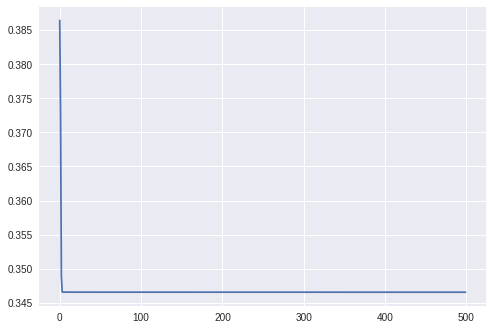

In [20]:
plt.plot(_Loss)

In [21]:
y_pred = model.predict(X)

accuracy(y_pred,y)

52.2